In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [3]:
# tạo danh sách lưu các giao dịch (transaction)
dataset = [['Eggs', 'Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'],
           ['Orange', 'Corn', 'Eggs', 'Yogurt'],           
           ['Milk', 'Apple', 'Orange', 'Eggs'], 
           ['Corn', 'Coke', 'Kidney Beans', 'Ice cream'],
           ['Dill', 'Onion', 'Nutmeg'],
           ['Coke', 'Apple', 'Ice cream']
        ]

In [4]:
# biến đổi dữ liệu
t_encode = TransactionEncoder()
# t_array = t_encode.fit(dataset).transform(dataset)
t_array = t_encode.fit_transform(dataset)
df = pd.DataFrame(t_array, columns=t_encode.columns_)

In [5]:
df

,Apple,Coke,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Orange,Unicorn,Yogurt
0,False,False,False,False,True,False,True,True,True,True,False,False,True
1,False,False,False,True,True,False,False,False,True,True,False,False,True
2,True,False,False,False,True,False,True,True,False,False,False,False,False
3,False,False,True,False,False,False,True,True,False,False,False,True,True
4,False,False,True,False,True,True,True,False,False,True,False,False,False
5,False,False,True,False,True,False,False,False,False,False,True,False,True
6,True,False,False,False,True,False,False,True,False,False,True,False,False
7,False,True,True,False,False,True,True,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,True,True,False,False,False
9,True,True,False,False,False,True,False,False,False,False,False,False,False


In [6]:
df.isnull().any()

Apple           False
Coke            False
Corn            False
Dill            False
Eggs            False
Ice cream       False
Kidney Beans    False
Milk            False
Nutmeg          False
Onion           False
Orange          False
Unicorn         False
Yogurt          False
dtype: bool

In [7]:
# sử dụng apriori với giá trị ngưỡng dựa trên số transaction
frequent_itemset = apriori(df, min_support=0.3, use_colnames=True)
print(frequent_itemset)

    support              itemsets
0       0.3               (Apple)
1       0.4                (Corn)
2       0.6                (Eggs)
3       0.3           (Ice cream)
4       0.5        (Kidney Beans)
5       0.4                (Milk)
6       0.3              (Nutmeg)
7       0.4               (Onion)
8       0.4              (Yogurt)
9       0.3  (Kidney Beans, Corn)
10      0.3  (Eggs, Kidney Beans)
11      0.3          (Milk, Eggs)
12      0.3         (Eggs, Onion)
13      0.3        (Yogurt, Eggs)
14      0.3  (Milk, Kidney Beans)
15      0.3       (Nutmeg, Onion)


In [8]:
# tính confidence
from mlxtend.frequent_patterns import association_rules

In [8]:
association_rules(frequent_itemset, metric='confidence', min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Corn),0.5,0.4,0.3,0.60,1.50,0.10,1.5
1,(Corn),(Kidney Beans),0.4,0.5,0.3,0.75,1.50,0.10,2.0
2,(Eggs),(Kidney Beans),0.6,0.5,0.3,0.50,1.00,0.00,1.0
3,(Kidney Beans),(Eggs),0.5,0.6,0.3,0.60,1.00,0.00,1.0
4,(Eggs),(Milk),0.6,0.4,0.3,0.50,1.25,0.06,1.2
5,(Milk),(Eggs),0.4,0.6,0.3,0.75,1.25,0.06,1.6
6,(Eggs),(Onion),0.6,0.4,0.3,0.50,1.25,0.06,1.2
7,(Onion),(Eggs),0.4,0.6,0.3,0.75,1.25,0.06,1.6
8,(Eggs),(Yogurt),0.6,0.4,0.3,0.50,1.25,0.06,1.2
9,(Yogurt),(Eggs),0.4,0.6,0.3,0.75,1.25,0.06,1.6


In [9]:
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Corn),0.5,0.4,0.3,0.60,1.5,0.10,1.5
1,(Corn),(Kidney Beans),0.4,0.5,0.3,0.75,1.5,0.10,2.0
2,(Milk),(Kidney Beans),0.4,0.5,0.3,0.75,1.5,0.10,2.0
3,(Kidney Beans),(Milk),0.5,0.4,0.3,0.60,1.5,0.10,1.5
4,(Nutmeg),(Onion),0.3,0.4,0.3,1.00,2.5,0.18,inf
5,(Onion),(Nutmeg),0.4,0.3,0.3,0.75,2.5,0.18,2.8


In [10]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         6 non-null      object 
 1   consequents         6 non-null      object 
 2   antecedent support  6 non-null      float64
 3   consequent support  6 non-null      float64
 4   support             6 non-null      float64
 5   confidence          6 non-null      float64
 6   lift                6 non-null      float64
 7   leverage            6 non-null      float64
 8   conviction          6 non-null      float64
dtypes: float64(7), object(2)
memory usage: 560.0+ bytes


In [13]:
# "kiểm tra có giao dịch nào có Milk hay không? nếu có thì nó kết hợp với sp nào?"
for row in rules.iterrows():
    if 'Milk' in row[1][0]:
        print(row)

(2, antecedents                   (Milk)
consequents           (Kidney Beans)
antecedent support               0.4
consequent support               0.5
support                          0.3
confidence                      0.75
lift                             1.5
leverage                         0.1
conviction                       2.0
Name: 2, dtype: object)


In [23]:
rules[rules['antecedents'] == 'Milk']

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


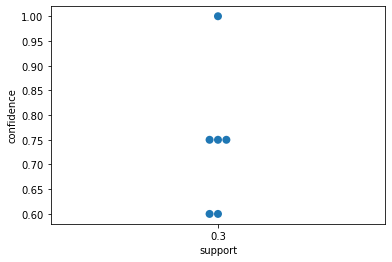

In [13]:
sns.swarmplot(data=rules, x='support', y ='confidence', size=8)
plt.show()

In [14]:
rules.iterrows()

<generator object DataFrame.iterrows at 0x0000012FD6D63E40>